In [1206]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from scipy.stats import norm
from scipy.linalg import cholesky

## Task 1: Probability

#### A. Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\Nu(x; 1; 1)$

In [1207]:
n = 1000
mu = 1
sigma_2 = 1
x = np.random.normal(mu, sigma_2, n)
pdf = norm.pdf(x)

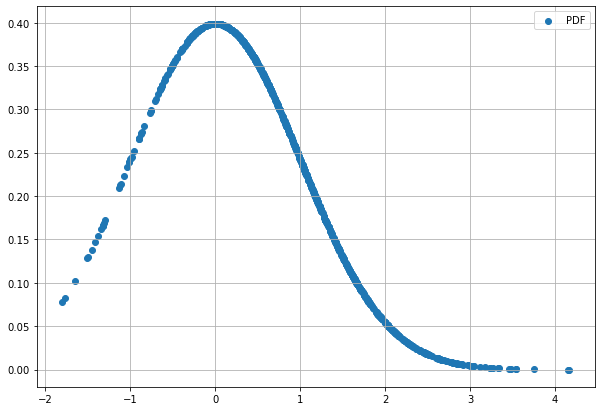

In [1208]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf,label='PDF')
plt.legend()
plt.grid()

#### B. Calculate the probability mass that the random variable $X$ is less than 0, that is, $Pr\{X <= 0\} = \int^{0}_{-\infty}{p(x)dx}$

In [1209]:
cdf = norm.cdf(x, loc=mu, scale=sigma_2)
p_mass = norm.cdf(0, loc=mu, scale=sigma_2)
print(f"P(X <= 0) = {p_mass:.4f}")

P(X <= 0) = 0.1587


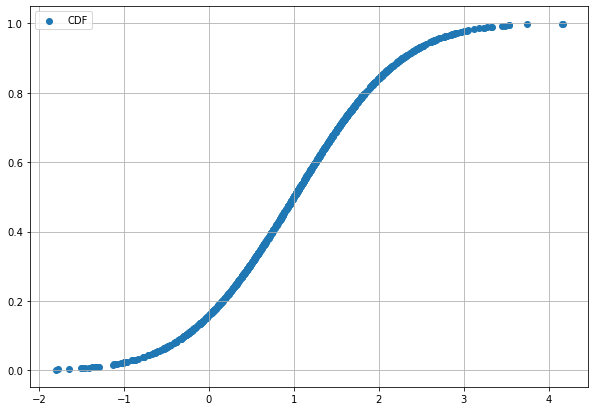

In [1210]:
plt.figure(figsize=(10,7))
plt.scatter(x, cdf,label='CDF')
plt.legend()
plt.grid()

#### C. Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \Nu(z; x; \sigma^2)$, with variance $\sigma^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.

In [1211]:
z = 0.75
sigma_z_2 = 0.2
z_x = np.random.normal(z, sigma_z_2, n)
p_z_x = norm.pdf(z_x)

In [1212]:
def p(x: float, mu: float, sigma_2: float) -> float:
    return np.exp(-0.5 * (x - mu) ** 2 / sigma_2) / np.sqrt(2 * np.pi * sigma_2)

In [1213]:
p_x = p(x=z, mu=mu, sigma_2=sigma_2)
p_z = p(x=z, mu=z, sigma_2=sigma_z_2)
p_x_z = p_z_x * p_x / p_z

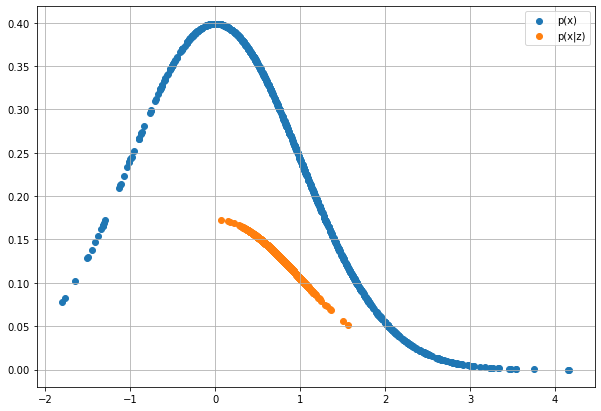

In [1214]:
plt.figure(figsize=(10,7))
plt.scatter(x, pdf,label='p(x)')
plt.scatter(z_x, p_x_z,label='p(x|z)')
plt.legend()
plt.grid()

## Task 2: Multivariate Gaussian

#### A. Write the function plot2dcov which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc. Then, use plot2dcov to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:

$\Nu(\begin{bmatrix}{0 \\ 0}\end{bmatrix})$

#### Use the set_aspect(’equal’) command and comment on them.

In [1215]:
def plot2dcov(mean: np.ndarray, cov: np.ndarray, k: List) -> None:
    L = cholesky(cov, lower=True)
    size = 200
    step = 2 * np.pi / size
    points = np.zeros((2, size))
    plt.figure(figsize=(10, 10))
    for j in range(k):
        for i in range(size):
            point = np.array([
                [mean[0, 0] + (j + 1) * np.cos(i * step)],
                [mean[1, 0] + (j + 1) * np.sin(i * step)],
            ])
            points[:, i] = (L @ point).flatten()
        plt.plot(points[0, :], points[1, :],label=f"{j + 1}-sigma iso-contour")
    plt.axis('equal')
    plt.legend()
    plt.grid()
    return

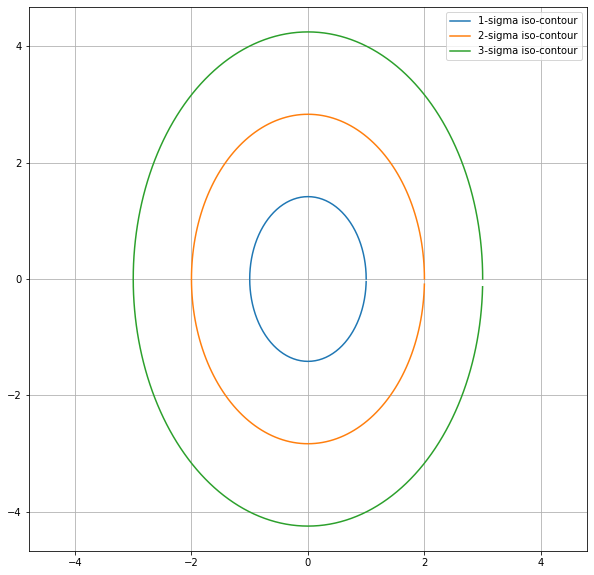

In [1216]:
mu = np.array([[0], [0]])
sigma = np.array([
    [1, 0],
    [0, 2]
])
plot2dcov(mu, sigma, 3)

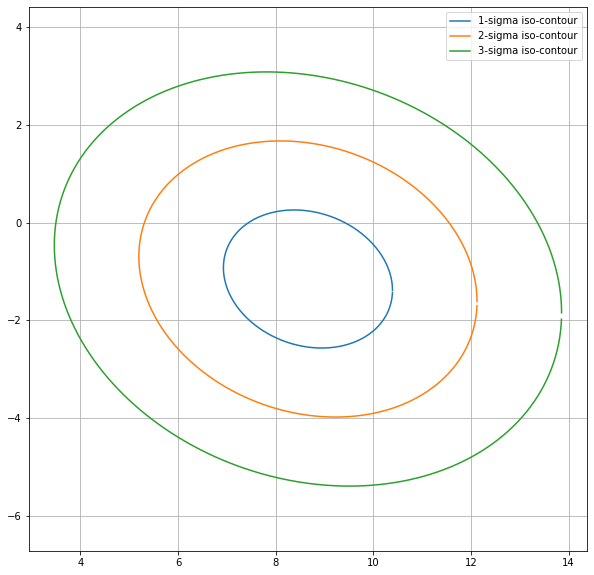

In [1217]:
mu = np.array([[5], [0]])
sigma = np.array([
    [3, -0.4],
    [-0.4, 2]
])
plot2dcov(mu, sigma, 3)

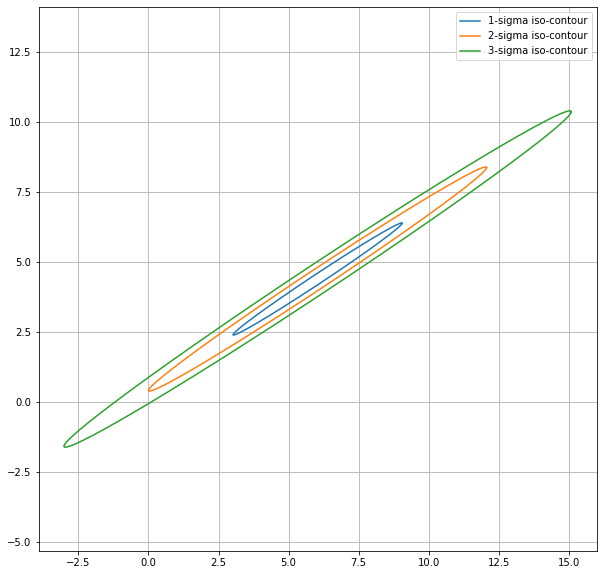

In [1218]:
mu = np.array([[2], [2]])
sigma = np.array([
    [9.1, 6],
    [6, 4]
])
plot2dcov(mu, sigma, 3)